# Info
Purpose:

    To build up proposal work for supporting a potential NASA deployment occuring during EPCAPE
    Thought is to focus on the air movement in the Los Angeles bay area.

Input:

    None

Output:

    Figures and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2022-02-07
    Modified:


# Prepare python environment

In [23]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import cartopy.crs as ccrs

In [7]:
name = 'EPCAPE'
vv = 'v1'
fp = getpath(name)


Return path named:  EPCAPE /data/sam/EPCAPE/


In [8]:
fp

'/data/sam/EPCAPE/'

# Load files

In [12]:
zonal = lu.load_netcdf(fp+'NCEP_1980_2020_MaytoJuly_CONUS_zonal.nc',everything=True)

Reading file: /data/sam/EPCAPE/NCEP_1980_2020_MaytoJuly_CONUS_zonal.nc
Outputting the Data subdatasets:
0: VAR
1: lat
2: lon
[b'VAR', b'lat', b'lon']


In [13]:
meri = lu.load_netcdf(fp+'NCEP_1980_2020_MaytoJuly_CONUS_meridional.nc',everything=True)

Reading file: /data/sam/EPCAPE/NCEP_1980_2020_MaytoJuly_CONUS_meridional.nc
Outputting the Data subdatasets:
0: VAR
1: lat
2: lon
[b'VAR', b'lat', b'lon']


In [52]:
m2 = lu.load_netcdf(fp+'MERRA2_1980_2020_MaytoJuly_CONUS_meridional.nc',everything=True)

Reading file: /data/sam/EPCAPE/MERRA2_1980_2020_MaytoJuly_CONUS_meridional.nc
Outputting the Data subdatasets:
0: VAR
1: lat
2: lon
[b'VAR', b'lat', b'lon']


In [24]:
u = zonal[0][b'VAR']
v = meri[0][b'VAR']
lat = zonal[0][b'lat']
lon = zonal[0][b'lon']

# Plot out data

<IPython.core.display.Javascript object>


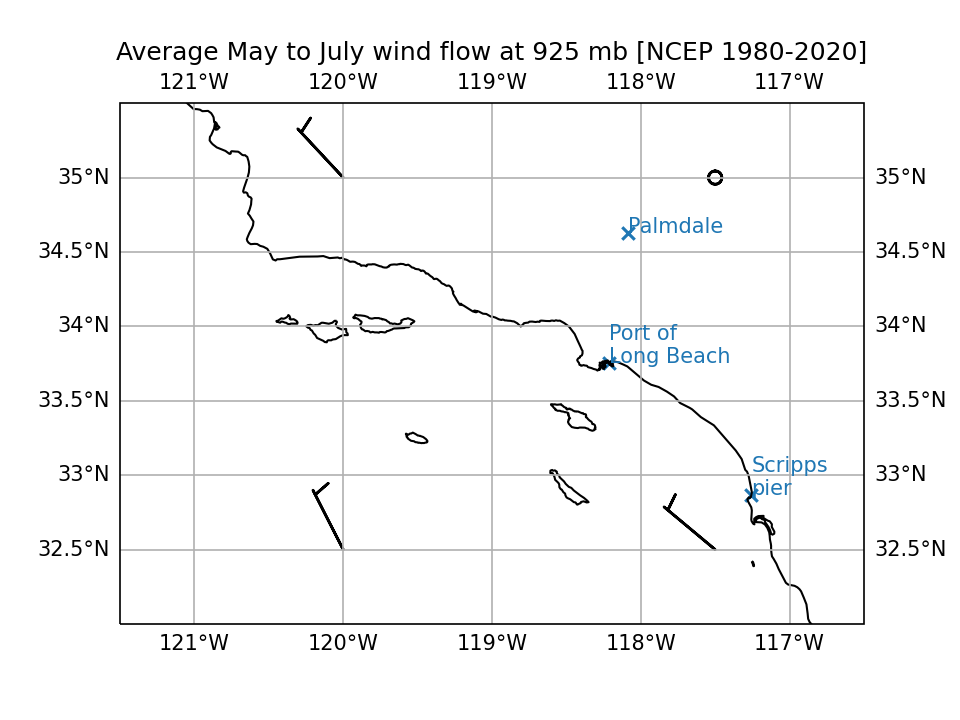

In [82]:
plt.figure()
cc = ccrs.PlateCarree()
ax = plt.axes(projection=cc)
ax.set_extent([-121.5, -116.5, 32.,35.5])
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True,auto_update=True)
ax.barbs(lon, lat, u, v, length=8,
             sizes=dict(emptybarb=0.1, spacing=0.05, height=0.5),
             linewidth=1.3,transform=cc)
#plt.streamplot(lon,lat,u,v,transform=ccrs.PlateCarree())

ax.annotate('Palmdale',[ -118.084444,34.629444],transform=cc,c='tab:blue')
ax.scatter(-118.084444,34.629444,transform=cc,marker='x',c='tab:blue')

ax.annotate('Scripps\npier',[-117.257306, 32.867010],transform=cc,c='tab:blue')
ax.scatter(-117.257306, 32.867010,transform=cc,marker='x',c='tab:blue')

#ax.annotate('Mt Soledad',[-117.252110,32.839502],transform=cc,c='tab:blue')
#ax.scatter(-117.252110,32.839502,transform=cc,marker='x',c='tab:blue')

ax.annotate('Port of\nLong Beach',[-118.216903,33.753972],transform=cc,c='tab:blue')
ax.scatter(-118.216903,33.753972,transform=cc,marker='x',c='tab:blue')
ax.set_title('Average May to July wind flow at 925 mb [NCEP 1980-2020]')
plt.savefig(fp+'/map_MaytoJuly_wind_NCEP.png',dpi=600,transparent=True)